# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.metrics import mean_absolute_error , accuracy_score , mean_squared_error, r2_score , mean_squared_error as root_mean_squared_error

# 2. Load Data

In [2]:
df = pd.read_csv('insurance_dirty.csv')
print(f"Initial shape: {df.shape}")
df.head()

Initial shape: (1388, 7)


,age,sex,bmi,children,smoker,region,charges
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,male,33.77,1.0,no,southeast,1725.5523
2,28.0,male,33.0,3.0,no,southeast,4449.462
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.88,0.0,no,northwest,3866.8552


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1315 non-null   object 
 1   sex       1315 non-null   object 
 2   bmi       1315 non-null   object 
 3   children  1315 non-null   float64
 4   smoker    1315 non-null   object 
 5   region    1315 non-null   object 
 6   charges   1315 non-null   object 
dtypes: float64(1), object(6)
memory usage: 76.0+ KB


# 3. Check Missing Values

In [4]:
print("\n" + "="*50)
print("Missing values per column:")
print(df.isnull().sum())
print("\nMissing values percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))


Missing values per column:
age         73
sex         73
bmi         73
children    73
smoker      73
region      73
charges     73
dtype: int64

Missing values percentage:
age         5.26
sex         5.26
bmi         5.26
children    5.26
smoker      5.26
region      5.26
charges     5.26
dtype: float64


# 4. Remove Empty Rows and Duplicates

In [5]:
df = df.dropna(how='all')
print(f"After removing empty rows: {df.shape}")

df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")

After removing empty rows: (1315, 7)
After removing duplicates: (1269, 7)


# 5. Clean Age Column

In [6]:
def clean_age(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if value.lower() == 'twenty':
            return 20
        try:
            return float(value)
        except:
            return np.nan
    try:
        return float(value)
    except:
        return np.nan

df['age'] = df['age'].apply(clean_age)
print("Age column cleaned")
print(f"Age missing values: {df['age'].isnull().sum()}")

Age column cleaned
Age missing values: 0


# 6. Clean BMI Column

In [7]:

def clean_bmi(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if value == '??' or value.strip() == '':
            return np.nan
        try:
            val = float(value)
            if val > 60 or val < 10:
                return np.nan
            return val
        except:
            return np.nan
    try:
        val = float(value)
        if val > 60 or val < 10:
            return np.nan
        return val
    except:
        return np.nan

df['bmi'] = df['bmi'].apply(clean_bmi)
print("BMI column cleaned")
print(f"BMI missing values: {df['bmi'].isnull().sum()}")

BMI column cleaned
BMI missing values: 2


# 7. Clean Charges Column

In [8]:
def clean_charges(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if value.lower() == 'free' or value.strip() == '':
            return np.nan
        try:
            val = float(value)
            if val > 100000 or val < 1000:
                return np.nan
            return val
        except:
            return np.nan
    try:
        val = float(value)
        if val > 100000 or val < 1000:
            return np.nan
        return val
    except:
        return np.nan

df['charges'] = df['charges'].apply(clean_charges)
print("\nCharges column cleaned")
print(f"Charges missing values: {df['charges'].isnull().sum()}")


Charges column cleaned
Charges missing values: 2


# 8. Clean Children and Categorical Columns

In [9]:

df['children'] = pd.to_numeric(df['children'], errors='coerce')

# Clean categorical columns
if df['sex'].dtype == 'object':
    df['sex'] = df['sex'].str.strip().str.lower()
if df['smoker'].dtype == 'object':
    df['smoker'] = df['smoker'].str.strip().str.lower()
if df['region'].dtype == 'object':
    df['region'] = df['region'].str.strip().str.lower()

print("Children and categorical columns cleaned")
print(f"\nUnique values:")
print(f"Sex: {df['sex'].unique()}")
print(f"Smoker: {df['smoker'].unique()}")
print(f"Region: {df['region'].unique()}")

Children and categorical columns cleaned

Unique values:
Sex: ['male' 'female']
Smoker: ['no' 'yes']
Region: ['southeast' 'northwest' 'northeast' 'southwest']


# 9. Handle Missing Values

In [10]:
df = df.dropna(subset=['age', 'charges'])
print(f"After removing rows with missing age/charges: {df.shape}")

imputer = SimpleImputer(strategy='median')
df[['bmi', 'children']] = imputer.fit_transform(df[['bmi', 'children']])

print(f"\nMissing values after imputation:")
print(df.isnull().sum())

After removing rows with missing age/charges: (1267, 7)

Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# 10: Convert Data Types

In [11]:
df['age'] = df['age'].astype(float)
df['bmi'] = df['bmi'].astype(float)
df['children'] = df['children'].astype(int)
df['charges'] = df['charges'].astype(float)

print("Data types converted successfully")
df.dtypes

Data types converted successfully


age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 11. Validate and Fill Categorical Values

In [12]:

valid_sex = ['male', 'female']
valid_smoker = ['yes', 'no']
valid_regions = ['northeast', 'northwest', 'southeast', 'southwest']


df = df[df['sex'].isin(valid_sex) | df['sex'].isna()]
df = df[df['smoker'].isin(valid_smoker) | df['smoker'].isna()]
df = df[df['region'].isin(valid_regions) | df['region'].isna()]


if df['sex'].isna().any():
    df['sex'] = df['sex'].fillna(df['sex'].mode()[0] if len(df['sex'].mode()) > 0 else 'male')
if df['smoker'].isna().any():
    df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0] if len(df['smoker'].mode()) > 0 else 'no')
if df['region'].isna().any():
    df['region'] = df['region'].fillna(df['region'].mode()[0] if len(df['region'].mode()) > 0 else 'southeast')

print(f"Final shape: {df.shape}")
print(f"\nFinal missing values:")
print(df.isnull().sum())

Final shape: (1267, 7)

Final missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# 12. Summary Statistics

In [13]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          bmi     children       charges
count  1267.000000  1267.000000  1267.000000   1267.000000
mean     39.224152    30.625284     1.082873  13238.588597
std      14.027009     6.114596     1.195138  12082.524268
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.220000     0.000000   4749.061450
50%      39.000000    30.305000     1.000000   9361.326800
75%      51.000000    34.580000     2.000000  16516.743675
max      64.000000    53.130000     5.000000  63770.428010


# 13. Encode Categorical Variables with OneHotEncoder

In [14]:
# Encode Categorical Variables with OneHotEncoder
df_encoded = df.copy()

label_encoders = {}
binary_cols = ['sex', 'smoker']

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"\n{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# One-hot encoding for region
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

print("\nColumns after encoding:")
print(list(df.columns))


sex encoding: {'female': np.int64(0), 'male': np.int64(1)}

smoker encoding: {'no': np.int64(0), 'yes': np.int64(1)}

Columns after encoding:
['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest']


# 14. Display Encoded Data

In [15]:
print("Encoded data preview:")
df_encoded.head(10)

Encoded data preview:


,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,30.305,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692
10,20.0,male,26.220,0,no,northeast,2721.32080
11,62.0,female,26.290,0,yes,southeast,27808.72510


# 15. Check Imbalance in Smoker Variable


Original smoker distribution:
smoker
0    79.558011
1    20.441989
Name: proportion, dtype: float64


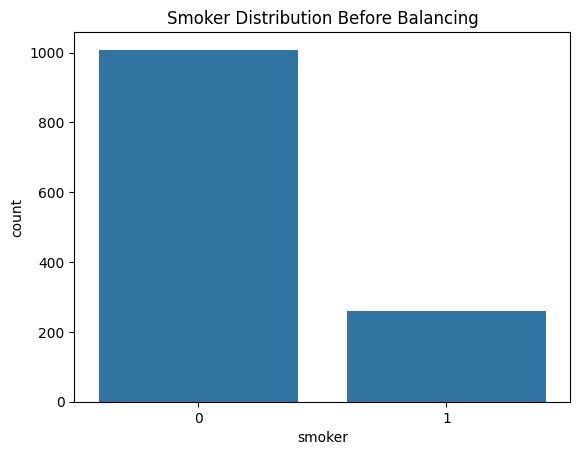

In [16]:
print("\n" + "="*50)
print("Original smoker distribution:")
print(df['smoker'].value_counts(normalize=True) * 100)

# Visualize imbalance
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution Before Balancing')
plt.show()

# 16. Balance Data by Oversampling Minority (Smokers)


Balanced smoker distribution:
smoker
1    50.0
0    50.0
Name: proportion, dtype: float64


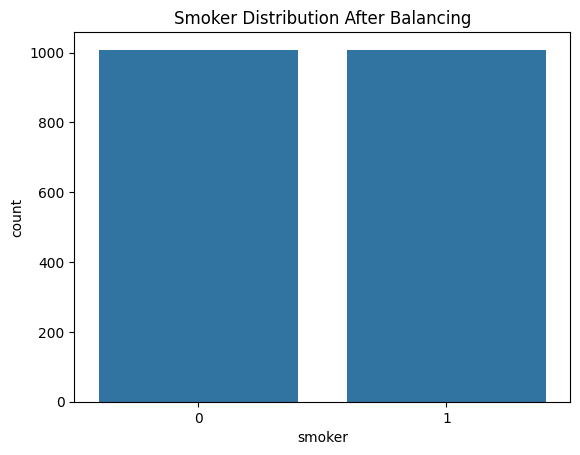


New balanced shape: (2016, 9)


In [17]:
y = df['charges']
X = df.drop('charges', axis=1)

# Apply SMOTE only to smoker feature for balancing
df_majority = df[df['smoker'] == 0]
df_minority = df[df['smoker'] == 1]

# Oversample minority to match majority size
df_minority_upsampled = df_minority.sample(
    n=len(df_majority),
    replace=True,
    random_state=42
)

# Combine back
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced smoker distribution:")
print(df_balanced['smoker'].value_counts(normalize=True) * 100)

# Visualize after balancing
sns.countplot(x='smoker', data=df_balanced)
plt.title('Smoker Distribution After Balancing')
plt.show()

print(f"\nNew balanced shape: {df_balanced.shape}")

# 17. Prepare X and y from Balanced Data

In [18]:
y = df_balanced['charges']
X = df_balanced.drop('charges', axis=1)

print("\nX (features) shape:", X.shape)
print("X columns:", list(X.columns))
print("\ny (target) shape:", y.shape)
print("\nX (features) preview:")
print(X.head())
print("\ny (target) preview:")
print(y.head())


X (features) shape: (2016, 8)
X columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

y (target) shape: (2016,)

X (features) preview:
    age  sex     bmi  children  smoker  region_northwest  region_southeast  \
0  18.0    1  25.175         0       1             False             False   
1  20.0    1  32.395         1       0              True             False   
2  32.0    0  44.220         0       0             False              True   
3  36.0    0  22.600         2       1             False             False   
4  62.0    0  36.860         1       0             False             False   

   region_southwest  
0             False  
1             False  
2             False  
3              True  
4             False  

y (target) preview:
0    15518.18025
1     2362.22905
2     3994.17780
3    18608.26200
4    31620.00106
Name: charges, dtype: float64


# 18. Scale Numerical Features

In [19]:
numerical_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nScaled data shape:", X_scaled.shape)
print("Columns after scaling:", list(X_scaled.columns))
print(X_scaled.head())


Scaled data shape: (2016, 8)
Columns after scaling: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']
        age  sex       bmi  children  smoker  region_northwest  \
0 -1.484044    1 -0.869402 -0.919801       1             False   
1 -1.341412    1  0.302174 -0.066063       0              True   
2 -0.485625    0  2.220995 -0.919801       0             False   
3 -0.200363    0 -1.287242  0.787675       1             False   
4  1.653843    0  1.026701 -0.066063       0             False   

   region_southeast  region_southwest  
0             False             False  
1             False             False  
2              True             False  
3             False              True  
4             False             False  


#  19. Split Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n" + "="*50)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target size: {y_train.shape}")
print(f"Test target size: {y_test.shape}")



Training set size: (1612, 8)
Test set size: (404, 8)
Training target size: (1612,)
Test target size: (404,)


# 20. Build Random Forest Model

In [21]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

# 21. Train the model

In [22]:
rf_model.fit(X_train, y_train)
print("\nRandom Forest model trained successfully!")


Random Forest model trained successfully!


# 22. Make Predictions

In [23]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# 23. Evaluate Model

In [24]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print("\nTraining Set Performance:")
print(f"MSE:  {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE:  {train_mae:.2f}")
print(f"R²:   {train_r2* 100:.2f}")

#Test metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\nTest Set Performance:")
print(f"MSE:  {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE:  {test_mae:.2f}")
print(f"R²:   {test_r2* 100:.2f}")



MODEL EVALUATION

Training Set Performance:
MSE:  8475906.66
RMSE: 2911.34
MAE:  1393.35
R²:   96.11

Test Set Performance:
MSE:  11383156.44
RMSE: 3373.89
MAE:  1702.86
R²:   94.56


# 24: Feature Importance


Feature Importance:
            feature  importance
4            smoker    0.645056
2               bmi    0.263816
0               age    0.078478
3          children    0.006655
1               sex    0.002505
5  region_northwest    0.001274
7  region_southwest    0.001134
6  region_southeast    0.001082


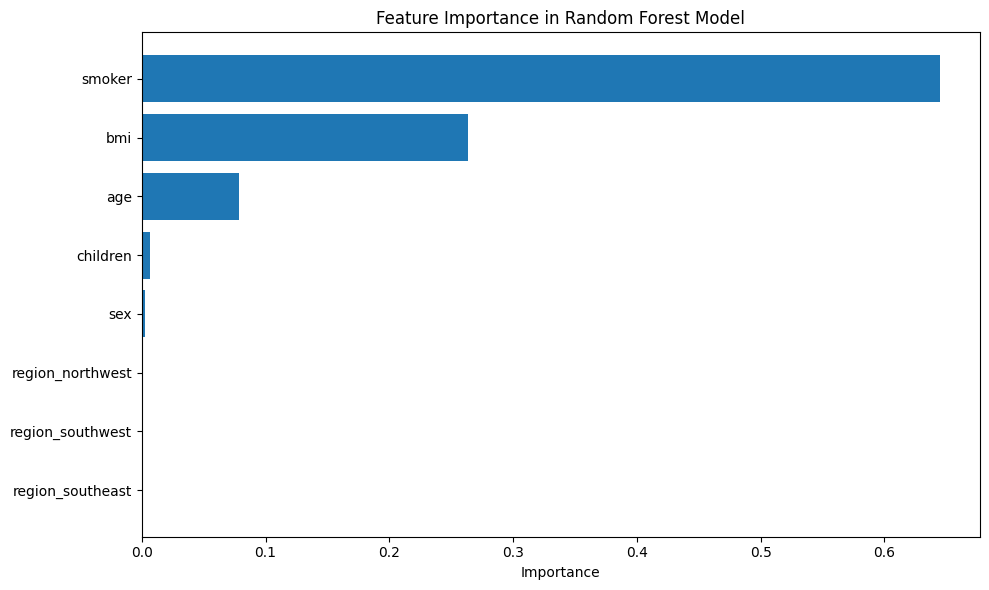

In [25]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 25. Prediction vs Actual Plot

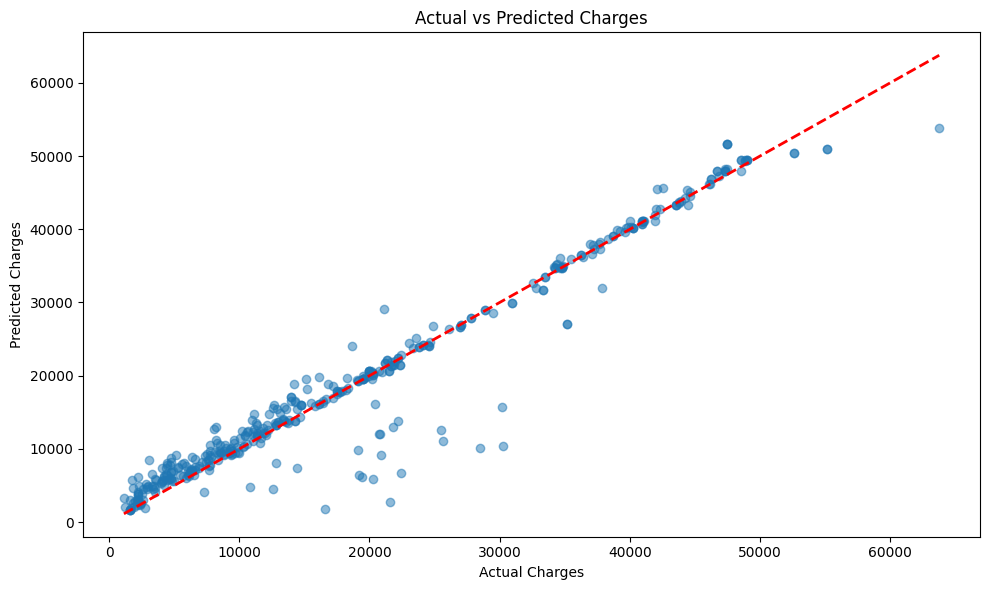


Pipeline completed successfully!


In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Pipeline completed successfully!")
print("="*50)

# 26. Prediction Results Table

In [27]:
print("\n" + "="*60)
print("PREDICTION RESULTS TABLE")
print("="*60)

results_df = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges': y_pred_test,
    'Difference': y_test.values - y_pred_test,
    'Absolute Error': np.abs(y_test.values - y_pred_test)
})

print("\nPrediction Results (First 15 rows):")
print(results_df.head(15))


PREDICTION RESULTS TABLE

Prediction Results (First 15 rows):
    Actual Charges  Predicted Charges   Difference  Absolute Error
0      42303.69215       42747.967497  -444.275347      444.275347
1      38711.00000       39094.429022  -383.429022      383.429022
2       5584.30570        7985.331292 -2401.025592     2401.025592
3       3410.32400        4962.024640 -1551.700640     1551.700640
4      11093.62290       12786.192872 -1692.569972     1692.569972
5      24667.41900       24612.088460    55.330540       55.330540
6       5920.10410        5991.022413   -70.918313       70.918313
7      33307.55080       31747.411244  1560.139556     1560.139556
8       3353.47030        4516.914047 -1163.443747     1163.443747
9      13747.87235       13549.726589   198.145761      198.145761
10     41097.16175       41128.019613   -30.857863       30.857863
11      2457.21115        2636.391364  -179.180214      179.180214
12      5458.04645        6384.955311  -926.908861      926.908861

#  27: Save Processed Data

In [28]:
print("\n" + "="*60)
print("SAVE PROCESSED DATA")
print("="*60)

df_balanced.to_csv('insurance_encoded.csv', index=False)
print("✓ Encoded data saved to 'insurance_encoded.csv'")

# Save encoded and scaled data
df_encoded_scaled = X_scaled.copy()
df_encoded_scaled['charges'] = y
df_encoded_scaled.to_csv('insurance_encoded_scaled.csv', index=False)
print("✓ Encoded and scaled data saved to 'insurance_encoded_scaled.csv'")


SAVE PROCESSED DATA
✓ Encoded data saved to 'insurance_encoded.csv'
✓ Encoded and scaled data saved to 'insurance_encoded_scaled.csv'


# 28. Predict Charges for New / Unseen Data (Interactive)

In [31]:

import pandas as pd
import numpy as np

def predict_new_data():
    print("\n" + "="*60)
    print("   INTERACTIVE INSURANCE CHARGE PREDICTOR")
    print("   (Type 'quit' at any time to exit)")
    print("="*60)
    
    while True:
        print("\n" + "-"*40)
        age_input = input("Enter age (18-64) → ").strip()
        if age_input.lower() == 'quit':
            print("Thank you! Prediction session ended.")
            break
            
        sex = input("Enter sex (male/female) → ").strip().lower()
        bmi_input = input("Enter BMI (e.g., 25.5) → ").strip()
        children_input = input("Enter number of children → ").strip()
        smoker = input("Smoker? (yes/no) → ").strip().lower()
        region = input("Enter region (northeast/northwest/southeast/southwest) → ").strip().lower()
        
        # Allow quitting mid-input
        if any(x.lower() == 'quit' for x in [sex, bmi_input, children_input, smoker, region]):
            print("Thank you! Prediction session ended.")
            break

        try:
            # Create new data point
            new_data = pd.DataFrame({
                'age': [float(age_input)],
                'sex': [sex],
                'bmi': [float(bmi_input)],
                'children': [int(children_input)],
                'smoker': [smoker],
                'region': [region]
            })
            
            # Transform using the same preprocessor
            new_processed = preprocessor.transform(new_data)
            
            # Predict
            predicted_charge = best_model.predict(new_processed)[0]
            
            print(f"\nPredicted Insurance Charge: ${predicted_charge:,.2f}")
            print("   (This is an estimate based on the trained model)\n")
            
        except ValueError:
            print("Invalid input! Age, BMI, and children must be numbers.")
        except Exception as e:
            print(f"Error: {e}. Please check your inputs and try again.")

# Run the predictor
predict_new_data()


   INTERACTIVE INSURANCE CHARGE PREDICTOR
   (Type 'quit' at any time to exit)

----------------------------------------
Invalid input! Age, BMI, and children must be numbers.

----------------------------------------
Invalid input! Age, BMI, and children must be numbers.

----------------------------------------
Thank you! Prediction session ended.


In [33]:
def predict_new_data():
    print("\n" + "="*60)
    print(" INTERACTIVE INSURANCE CHARGE PREDICTOR")
    print("   (Type 'quit' at any time to exit)")
    print("="*60)
    
    # Valid input ranges and options
    valid_regions = ['northeast', 'northwest', 'southeast', 'southwest']
    valid_sex = ['male', 'female']
    valid_smoker = ['yes', 'no']
    
    while True:
        print("\n" + "-"*60)
        print(" Please enter the following information:")
        print("-"*60)
        
        try:
            age_input = input(" Age (18-64): ").strip()
            if age_input.lower() == 'quit':
                print("\n Thank you! Prediction session ended.")
                break
            
            age = float(age_input)
            if not (18 <= age <= 64):
                print(" Age must be between 18 and 64. Please try again.")
                continue
            
            sex = input("  Sex (male/female): ").strip().lower()
            if sex == 'quit':
                print("\n Thank you! Prediction session ended.")
                break
            if sex not in valid_sex:
                print(f" Sex must be one of: {', '.join(valid_sex)}")
                continue
            
            bmi_input = input(" BMI (e.g., 25.5): ").strip()
            if bmi_input.lower() == 'quit':
                print("\n Thank you! Prediction session ended.")
                break
            
            bmi = float(bmi_input)
            if not (15 <= bmi <= 55):
                print(" BMI must be between 15 and 55. Please try again.")
                continue
            
            children_input = input(" Number of children (0-5): ").strip()
            if children_input.lower() == 'quit':
                print("\nThank you! Prediction session ended.")
                break
            
            children = int(children_input)
            if not (0 <= children <= 5):
                print("  Number of children must be between 0 and 5.")
                continue
            
            smoker = input(" Smoker? (yes/no): ").strip().lower()
            if smoker == 'quit':
                print("\n Thank you! Prediction session ended.")
                break
            if smoker not in valid_smoker:
                print(f"  Smoker must be one of: {', '.join(valid_smoker)}")
                continue
            
            region = input(" Region (northeast/northwest/southeast/southwest): ").strip().lower()
            if region == 'quit':
                print("\n Thank you! Prediction session ended.")
                break
            if region not in valid_regions:
                print(f" Region must be one of: {', '.join(valid_regions)}")
                continue
            
            new_data = pd.DataFrame({
                'age': [age],
                'sex': [sex],
                'bmi': [bmi],
                'children': [children],
                'smoker': [smoker],
                'region': [region]
            })
           
            new_data_encoded = new_data.copy()
            
            new_data_encoded['sex'] = 1 if sex == 'male' else 0
            
            new_data_encoded['smoker'] = 1 if smoker == 'yes' else 0
            
            region_dummies = pd.get_dummies(new_data_encoded['region'], prefix='region', drop_first=True)
            new_data_encoded = pd.concat([new_data_encoded.drop('region', axis=1), region_dummies], axis=1)
            
            for col in ['region_northwest', 'region_southeast', 'region_southwest']:
                if col not in new_data_encoded.columns:
                    new_data_encoded[col] = 0
            
            column_order = ['age', 'sex', 'bmi', 'children', 'smoker', 
                          'region_northwest', 'region_southeast', 'region_southwest']
            new_data_encoded = new_data_encoded[column_order]
            
            numerical_cols = ['age', 'bmi', 'children']
            new_data_scaled = new_data_encoded.copy()
            new_data_scaled[numerical_cols] = scaler.transform(new_data_encoded[numerical_cols])
            
            predicted_charge = rf_model.predict(new_data_scaled)[0]
            print(f"\nPredicted Annual Insurance Charge:")
            print(f"   ${predicted_charge:,.2f}")

            print("\n" + "-"*60)
            another = input(" Make another prediction? (yes/no): ").strip().lower()
            if another not in ['yes', 'y']:
                print("\n Thank you! Prediction session ended.")
                break
                
        except ValueError as e:
            print(f"\n Invalid input format: {str(e)}")
            print("   Please ensure age, BMI, and children are numbers.")
            continue
            
        except Exception as e:
            print(f"\n Error: {str(e)}")
            print("   Please check your inputs and try again.")
            continue


predict_new_data()


 INTERACTIVE INSURANCE CHARGE PREDICTOR
   (Type 'quit' at any time to exit)

------------------------------------------------------------
 Please enter the following information:
------------------------------------------------------------

 Thank you! Prediction session ended.
